In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
# 한글 폰트(맑은 고딕) 적용
matplotlib.rc('font', family='Malgun Gothic')

matplotlib.rcParams['axes.unicode_minus'] = False

In [30]:
df = pd.read_csv("./fin_Total_0823.csv",encoding='utf-8')
df

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu,Yn_stln
0,1,공무원,5400,7700,4,1,24.0,0,0,0,...,13,3,420001,0,0,1,1,1,1,0
1,3,주부,3600,4900,4,1,34.0,0,0,0,...,121,0,0,0,0,0,4,0,1,0
2,5,공무원,4800,4800,4,1,14.0,0,0,0,...,97,0,0,0,0,0,1,1,0,1
3,6,3차산업 종사자,4400,7700,2,2,0.0,3300,0,0,...,121,0,0,0,0,0,4,0,1,0
4,7,주부,3600,7700,5,3,19.0,4400,1,200106,...,121,1,6001,0,0,1,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89861,102248,자영업,5500,12900,3,3,34.0,0,0,0,...,121,0,0,0,0,1,4,0,1,0
89862,102249,운전직,4600,9800,5,2,19.0,5200,0,0,...,121,0,0,0,0,0,1,1,1,0
89863,102250,자영업,4800,10400,4,2,14.0,5600,0,0,...,121,0,0,0,0,1,1,1,1,0
89864,102251,사무직,4200,4200,1,1,0.0,0,0,0,...,121,0,0,0,0,0,4,0,0,0


In [4]:
df['AGE'].unique()

array([50, 60, 45, 40, 55, 25, 30, 35, 65, 20, 70], dtype=int64)

In [5]:
# 20대는 2265
gen_20 = df[df['AGE']<30]
# 30대는 115,891
gen_30 = df[df['AGE']<40][df['AGE']>=30]
# 40대는 30836
gen_40 = df[df['AGE']<50][df['AGE']>=40]
# 50대는 29,756
gen_50 = df[df['AGE']<60][df['AGE']>=50]
# 60대는 10813
gen_60 = df[df['AGE']<70][df['AGE']>=60]
# 70대는 305
gen_70 = df[df['AGE']>=70]

In [6]:
agegroup = []
for n in df["AGE"]:
    if n == 20:
        agegroup.append('20')
#         20대
    elif n ==25:
        agegroup.append('20')
#         20대
    elif n ==30:
        agegroup.append('30')
#         30대
    elif n ==35:
        agegroup.append('30')
    elif n ==40:
        agegroup.append('40')
    elif n ==45:
        agegroup.append('40')
    elif n ==50:
        agegroup.append('50')
    elif n ==55:
        agegroup.append('50')
    elif n ==60:
        agegroup.append('60')
    elif n ==65:
        agegroup.append('60')
    elif n ==70:
        agegroup.append('70')

agegroup

['50',
 '60',
 '40',
 '40',
 '40',
 '60',
 '40',
 '40',
 '50',
 '40',
 '20',
 '40',
 '20',
 '30',
 '50',
 '60',
 '40',
 '50',
 '30',
 '30',
 '50',
 '50',
 '60',
 '60',
 '40',
 '30',
 '50',
 '40',
 '50',
 '50',
 '50',
 '40',
 '30',
 '50',
 '50',
 '60',
 '30',
 '50',
 '50',
 '40',
 '60',
 '50',
 '40',
 '40',
 '60',
 '50',
 '40',
 '40',
 '30',
 '50',
 '40',
 '50',
 '30',
 '50',
 '30',
 '30',
 '30',
 '30',
 '40',
 '50',
 '50',
 '60',
 '30',
 '50',
 '40',
 '40',
 '40',
 '50',
 '40',
 '40',
 '60',
 '50',
 '60',
 '50',
 '50',
 '30',
 '50',
 '50',
 '40',
 '40',
 '50',
 '40',
 '50',
 '40',
 '30',
 '40',
 '40',
 '20',
 '30',
 '40',
 '40',
 '20',
 '40',
 '60',
 '50',
 '40',
 '40',
 '50',
 '50',
 '40',
 '60',
 '40',
 '40',
 '50',
 '40',
 '20',
 '40',
 '40',
 '50',
 '30',
 '60',
 '50',
 '20',
 '40',
 '30',
 '30',
 '30',
 '50',
 '40',
 '40',
 '40',
 '40',
 '50',
 '40',
 '40',
 '50',
 '40',
 '50',
 '40',
 '30',
 '40',
 '50',
 '50',
 '40',
 '50',
 '50',
 '40',
 '30',
 '60',
 '60',
 '40',
 '60',
 '30',

In [12]:
df["Agegroup"] =agegroup

## 연령별 - 추정소득, 신용대출건수, 신용대출 연체율


# anova 분석 - 연령대별 추정소득

In [ ]:
print(df[df['Agegroup']=="20"]['CUST_JOB_INCM'].shape,
df[df['Agegroup']=="30"]['CUST_JOB_INCM'].shape,
df[df['Agegroup']=="40"]['CUST_JOB_INCM'].shape,
df[df['Agegroup']=="50"]['CUST_JOB_INCM'].shape,
df[df['Agegroup']=="60"]['CUST_JOB_INCM'].shape,
df[df['Agegroup']=="70"]['CUST_JOB_INCM'].shape)

In [ ]:
# 제일 적은 수인 20대의수를 기준으로 랜덤으로 sampling 
twe= df[df['Agegroup']=="20"]['CUST_JOB_INCM'].sample(n=305,random_state=0).to_list()
thir = df[df['Agegroup']=="30"]['CUST_JOB_INCM'].sample(n=305,random_state=0).to_list()
four = df[df['Agegroup']=="40"]['CUST_JOB_INCM'].sample(n=305,random_state=0).to_list()
five = df[df['Agegroup']=="50"]['CUST_JOB_INCM'].sample(n=305,random_state=0).to_list()
six = df[df['Agegroup']=="60"]['CUST_JOB_INCM'].sample(n=305,random_state=0).to_list()
sev = df[df['Agegroup']=="70"]['CUST_JOB_INCM'].sample(n=305,random_state=0).to_list()

In [ ]:
# ANOVA- 일원분산분석
# 가설: 추정소득은 연령대 별로 다를 것이다.
string_list = ['twenty','thirty','fourty','fifty','sixty','seventy']
int_list = [twe,thir,four,five,six,sev]
dictionary = dict(zip(string_list, int_list))

df5=pd.DataFrame(dictionary)

# 일원분산분석 
# 귀무가설: 추정소득과 연령대의 평균이 모두 같다
# 대립가설: 추정소득과 연령대의 평균이 다른 것이 있다.

f_result= stats.f_oneway(df5['twenty'],df5['thirty'],df5['fourty'],df5['fifty'],df5['sixty'],df5['seventy'])
f,p = f_result.statistic.round(3),f_result.pvalue.round(3)
# f score, p-value 
print(f,p)

In [ ]:
df5

In [ ]:
dft

p value 가 0.05보다 작기 때문에 두 집단의 분포에는 차이가 있다. (귀무가설 기각, 연령대 별 차이 있음)

In [ ]:
df44= pd.DataFrame({"20": twe,
"30":thir,
"40": four,
"50": five,
"60": six,
"70": sev})

In [ ]:
dft = df44.T

In [ ]:
dft['소득 평균'] = dft.mean(axis=1)
#dft['비율']=dft['총합']/dft['총합'].sum()
dft[['소득 평균']].plot.bar()

In [ ]:
dft[['소득 평균']]

소득 평균은 5060이 가장 큰 것을 확인할 수 있다.

In [ ]:
dft

소득 총합

In [ ]:
dft.drop('소득 평균',axis=1)

In [ ]:
dft['소득 총합'] = dft.sum(axis=1)
#dft['비율']=dft['총합']/dft['총합'].sum()
dft[['소득 평균']].plot.bar()

In [ ]:
dft=dft.T

In [ ]:
a=dft['50']+dft['60']
print(a)
b=dft['20']+dft['30']+dft['40']+dft['70']
print(b)

In [ ]:
inc_5060=a
inc_n5060=b

string_list = ['inc_5060','inc_n5060']
int_list = [inc_5060,inc_n5060]
dictionary = dict(zip(string_list, int_list))

data5060=pd.DataFrame(dictionary)

In [ ]:
data5060

In [ ]:
data5060=data5060.T
data5060

In [ ]:
#data5060.drop(['소득평균','소득 평균'],axis=1, inplace=True)

In [ ]:
data5060

In [ ]:
# data5060['소득평균']=data5060['소득 총합']
data5060['소득평균'][0]=data5060['소득 총합'][0]/610
data5060['소득평균'][1]=data5060['소득 총합'][1]/1220
data5060

In [ ]:
data5060[['소득평균']].plot.bar()

#### 5060, 비5060의 소득평균금액 그래프 

In [ ]:
df5.boxplot(['twenty','thirty','fourty','fifty','sixty','seventy'])


# anova 분석 - 연령대별 신용 대출 건수

In [13]:
print(df[df['Agegroup']=="20"]['CRDT_LOAN_CNT'].shape,
df[df['Agegroup']=="30"]['CRDT_LOAN_CNT'].shape,
df[df['Agegroup']=="40"]['CRDT_LOAN_CNT'].shape,
df[df['Agegroup']=="50"]['CRDT_LOAN_CNT'].shape,
df[df['Agegroup']=="60"]['CRDT_LOAN_CNT'].shape,
df[df['Agegroup']=="70"]['CRDT_LOAN_CNT'].shape)

(2265,) (15891,) (30836,) (29756,) (10813,) (305,)


In [14]:
# 제일 적은 수인 20대의수를 기준으로 랜덤으로 sampling 
twe= df[df['Agegroup']=="20"]['CRDT_LOAN_CNT'].sample(n=305,random_state=0).to_list()
thir = df[df['Agegroup']=="30"]['CRDT_LOAN_CNT'].sample(n=305,random_state=0).to_list()
four = df[df['Agegroup']=="40"]['CRDT_LOAN_CNT'].sample(n=305,random_state=0).to_list()
five = df[df['Agegroup']=="50"]['CRDT_LOAN_CNT'].sample(n=305,random_state=0).to_list()
six = df[df['Agegroup']=="60"]['CRDT_LOAN_CNT'].sample(n=305,random_state=0).to_list()
sev = df[df['Agegroup']=="70"]['CRDT_LOAN_CNT'].sample(n=305,random_state=0).to_list()

In [17]:
# string_list 에 각 연령대의 연금저축상품월납입보험료를 붙인 dictionary를 만든다. 
# 가설: 연금저축상품의 월 납입 보험료는 연령대 별로 다를 것이다.
string_list = ['twenty','thirty','fourty','fifty','sixty','seventy']
int_list = [twe,thir,four,five,six,sev]
dictionary = dict(zip(string_list, int_list))

df5=pd.DataFrame(dictionary)

# 일원분산분석 
# 귀무가설: 집단의 평균이 모두 같다
# 대립가설: 집단의 평균이 다른 것이 있다.

f_result= stats.f_oneway(df5['twenty'],df5['thirty'],df5['fourty'],df5['fifty'],df5['sixty'],df5['seventy'])
f,p = f_result.statistic.round(3),f_result.pvalue.round(3)
# f score, p-value 
print(f,p)

6.0 0.0


p value 가 0.05보다 작기 때문에 두 집단의 분포에는 차이가 있다. (귀무가설 기각, 연령대 별 차이 있음)

In [18]:
df44= pd.DataFrame({"20": twe,
"30":thir,
"40": four,
"50": five,
"60": six,
"70": sev})
df44

,20,30,40,50,60,70
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,1,0,0,2
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
300,0,0,0,0,0,0
301,0,0,3,0,1,0
302,0,0,0,1,0,0
303,0,0,0,0,2,0


    0    1    2    3    4    5    6    7    8    9    ...  295  296  297  298  \
20    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
30    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
40    0    0    1    0    0    0    0    0    0    0  ...    0    0    0    0   
50    0    0    0    0    0    0    0    0    0    0  ...    1    0    0    0   
60    0    0    0    0    0    0    1    1    1    1  ...    0    0    0    0   
70    0    0    2    0    0    0    0    0    0    0  ...    0    0    0    0   

    299  300  301  302  303  304  
20    0    0    0    0    0    0  
30    0    0    0    0    0    0  
40    0    0    3    0    0    1  
50    0    0    0    1    0    0  
60    0    0    1    0    2    0  
70    0    0    0    0    0    0  

[6 rows x 305 columns]
    0  1  2  3  4  5  6  7  8  9  ...  296  297  298  299  300  301  302  303  \
20  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3

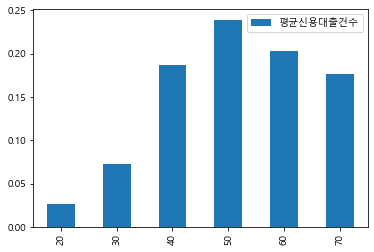

In [19]:
dft = df44.T
print(dft)
dft['평균신용대출건수'] = dft.mean(axis=1)
#dft['비율']=dft['총합']/dft['총합'].sum()
dft[['평균신용대출건수']].plot.bar()
print(dft)

50-60대의 평균 신용대출 건수가 다른 연령대에 비해 높음 

In [10]:
dft

NameError: name 'dft' is not defined

#### 5060, 비5060 평균신용대출건수 그래프

In [ ]:
dft.drop('평균신용대출건수',axis=1,inplace=True)

In [ ]:
dft= dft.T

In [ ]:
dft.columns

In [ ]:
dft

In [ ]:
a=dft['50']+dft['60']
# print(a)
b=dft['20']+dft['30']+dft['40']+dft['70']
# print(b)

In [ ]:
lncnt_5060=a
lncnt_n5060=b

string_list = ['lncnt_5060','lncnt_n5060']
int_list = [lncnt_5060,lncnt_n5060]
dictionary = dict(zip(string_list, int_list))

data5060=pd.DataFrame(dictionary)

In [ ]:
data5060

In [ ]:
data5060=data5060.T

In [ ]:
data5060

In [ ]:
data5060['총신용대출건수']=data5060.sum(axis=1)

In [ ]:
data5060

In [ ]:
data5060['평균신용대출건수']=data5060['총신용대출건수']
data5060['평균신용대출건수'][0]=data5060['총신용대출건수'][0]/610
data5060['평균신용대출건수'][1]=data5060['총신용대출건수'][1]/1220
data5060

In [ ]:
data5060=data5060.T
data5060

In [ ]:
data5060[data5060['lncnt_5060']!=0]['lncnt_5060'].value_counts()

In [ ]:
data5060[data5060['lncnt_5060']]

In [ ]:
#data5060=data5060.drop(['_5060신용대출건수','_평균신용대출건수'],axis=1,inplace=True)

In [ ]:
data5060

In [ ]:
df5.boxplot(['twenty','thirty','fourty','fifty','sixty','seventy'])

### ANOVA 검증 - 신용대출 연체율

In [26]:
print(df[df['Agegroup']=="20"]['CRLN_OVDU_RATE'].shape,
df[df['Agegroup']=="30"]['CRLN_OVDU_RATE'].shape,
df[df['Agegroup']=="40"]['CRLN_OVDU_RATE'].shape,
df[df['Agegroup']=="50"]['CRLN_OVDU_RATE'].shape,
df[df['Agegroup']=="60"]['CRLN_OVDU_RATE'].shape,
df[df['Agegroup']=="70"]['CRLN_OVDU_RATE'].shape)

(2265,) (15891,) (30836,) (29756,) (10813,) (305,)


In [27]:
# 제일 적은 수인 20대의수를 기준으로 랜덤으로 sampling 
twe= df[df['Agegroup']=="20"]['CRLN_OVDU_RATE'].sample(n=305,random_state=0).to_list()
thir = df[df['Agegroup']=="30"]['CRLN_OVDU_RATE'].sample(n=305,random_state=0).to_list()
four = df[df['Agegroup']=="40"]['CRLN_OVDU_RATE'].sample(n=305,random_state=0).to_list()
five = df[df['Agegroup']=="50"]['CRLN_OVDU_RATE'].sample(n=305,random_state=0).to_list()
six = df[df['Agegroup']=="60"]['CRLN_OVDU_RATE'].sample(n=305,random_state=0).to_list()
sev = df[df['Agegroup']=="70"]['CRLN_OVDU_RATE'].sample(n=305,random_state=0).to_list()

In [28]:
# string_list 에 각 연령대의 연금저축상품월납입보험료를 붙인 dictionary를 만든다. 
# 가설: 연금저축상품의 월 납입 보험료는 연령대 별로 다를 것이다.
string_list = ['twenty','thirty','fourty','fifty','sixty','seventy']
int_list = [twe,thir,four,five,six,sev]
dictionary = dict(zip(string_list, int_list))

df5=pd.DataFrame(dictionary)

In [29]:
# ANOVA 검증

f_result= stats.f_oneway(df5['twenty'],df5['thirty'],df5['fourty'],df5['fifty'],df5['sixty'],df5['seventy'])
f,p = f_result.statistic.round(3),f_result.pvalue.round(3)
# f score, p-value 
print(f,p)

9.734 0.0


P value 가 0.05보다 작기 때문에 연령대별로 차이가 있음을 알 수 있다. 

In [24]:
df44= pd.DataFrame({"20": twe,
"30":thir,
"40": four,
"50": five,
"60": six,
"70": sev})

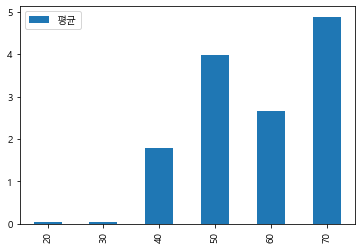

In [25]:
dft = df44.T
dft['평균'] = dft.mean(axis=1)
#dft['비율']=dft['총합']/dft['총합'].sum()
dft[['평균']].plot.bar()

In [ ]:
dft

 # 그래프가 이상함 

### chi squared 검증 - 연령대 별 신용대출 연체 여부

In [ ]:
#연령대별 신용대출 연체 여부 
idx =df[df['CRLN_OVDU_RATE'] == 0].index
idx
df['연체여부']=0 
for i in idx:
    df['연체여부'][i] = 1 # 연체 안한 사람 
df.head()

twe= df[df['Agegroup']=="20"]['연체여부'].sample(n=305,random_state=0).to_list()
thir = df[df['Agegroup']=="30"]['연체여부'].sample(n=305,random_state=0).to_list()
four = df[df['Agegroup']=="40"]['연체여부'].sample(n=305,random_state=0).to_list()
five = df[df['Agegroup']=="50"]['연체여부'].sample(n=305,random_state=0).to_list()
six = df[df['Agegroup']=="60"]['연체여부'].sample(n=305,random_state=0).to_list()
sev = df[df['Agegroup']=="70"]['연체여부'].sample(n=305,random_state=0).to_list()

df44= pd.DataFrame({"20": twe,
"30":thir,
"40": four,
"50": five,
"60": six,
"70": sev})
df

In [ ]:
df['PREM_OVDU_RATE']==0

In [ ]:
df

In [ ]:
# 연령대별(AGEGROUP) 
print(df[df['Agegroup']=="20"]['연체여부'].shape,
df[df['Agegroup']=="30"]['연체여부'].shape,
df[df['Agegroup']=="40"]['연체여부'].shape,
df[df['Agegroup']=="50"]['연체여부'].shape,
df[df['Agegroup']=="60"]['연체여부'].shape,
df[df['Agegroup']=="70"]['연체여부'].shape)

In [ ]:
# 제일 적은 수인 20대의수를 기준으로 랜덤으로 sampling 
twe= df[df['Agegroup']=="20"]['연체여부'].sample(n=305,random_state=0).to_list()
thir = df[df['Agegroup']=="30"]['연체여부'].sample(n=305,random_state=0).to_list()
four = df[df['Agegroup']=="40"]['연체여부'].sample(n=305,random_state=0).to_list()
five = df[df['Agegroup']=="50"]['연체여부'].sample(n=305,random_state=0).to_list()
six = df[df['Agegroup']=="60"]['연체여부'].sample(n=305,random_state=0).to_list()
sev = df[df['Agegroup']=="70"]['연체여부'].sample(n=305,random_state=0).to_list()

In [ ]:
# dataframe 만들기
string_list = ['twenty','thirty','fourty','fifty','sixty','seventy']
int_list = [twe,thir,four,five,six,sev]
dictionary = dict(zip(string_list, int_list))

data=pd.DataFrame(dictionary)

In [ ]:
data

In [ ]:
# 카이제곱분석
# 귀무 가설: 연령과 연체여부는 서로 관련이 없다. 
from scipy.stats import chi2_contingency
chi,pval,dof,expected=stats.chi2_contingency(data)
# f score, p-value 
 
print(chi,p)

chi squared 검정의 p value가 0.05보다 작으므로 연령별로 연체여부는 차이가 있다는 것을 알 수 있다. 

In [ ]:
data

In [ ]:
data = data.T
data

In [ ]:
data['연체경험있는사람'] = 305-data.sum(axis=1)
data

In [ ]:
data[['연체경험있는사람']].plot.bar()

In [ ]:
data['연체경험있는사람의비율']=data['연체경험있는사람']/305

In [ ]:
data

In [ ]:
data[['연체경험있는사람의비율']].plot.bar()

#### 연체 경험이 있는 사람의 비율이 다음과 같음

# 비연금저축상품월납입보험료

# 연금저축상품월납입보험료

# 실효해지건수

# 최근 1년 실효해지건수

In [ ]:
df

In [ ]:
df[df['Yn_ovdu']==1][df['Agegroup']=='20']

In [ ]:
df[df['Yn_ovdu']==1][df['Agegroup']=='40']